## Classical Planning project

In this project, a classical search agent is implemented to planning task. In this project, the planning problems are variations on an Air Cargo logistic problem-- if you have certain number of cargo and a set amount of planes, how do you get them from place to place?

11 different search algorithms are compared: 3 uninformed search methods (breadth first, depth first, and uniform cost searc), and 8 with heuristics (A star and greedy best first graph search with the heuristics of unmet goals, maxlevel, levelsum and setlevel), are tested against 4 different planning problems. The planning problems are of increasing complexity, and the searches are done through a planning graph. The code for the experiment can be found at [this github repo](https://github.com/wwymak/udacity-ai-nd-projects/tree/master/2_Classical%20Planning). All experiments are run using pypy rather than normal python to speed up calculation speeds.

### Measuring algorithm performance

As per ref [1], the performance of search algorithms are measured in terms of:

> Completeness: Is the algorithm guaranteed to find a solution when there is one?

> Optimality: Does the strategy find the optimal solution (it has the lowest path cost among all solutions) 

> Time complexity: How long does it take to find a solution?

> Space complexity: How much memory is needed to perform the search?

In the experiment set, we can think of space complexity as the number of nodes expanded, time complexity as the time taken to run the algorithm on a problem, and as we know the path plan for each of the strategies, we also know which algorithms are optimal.

### Experiment results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [10]:
df = pd.read_csv('run_search_output.csv')

#### The complete experiment output:

In [11]:
df

,problem,algo,action,nodes_expanded,goal_test,new_nodes,plan_length,time_to_run,time_run_pypy
0,1,breadth_first_search,20,43,56,178,6,0.006867,0.032478
1,1,depth_first_graph_search,20,21,22,84,20,0.005211,0.007989
2,1,uniform_cost_search,20,60,62,240,6,0.013549,0.019776
3,1,greedy_best_first_graph_search with h_unmet_goals,20,7,9,29,6,0.001590,0.003040
4,1,greedy_best_first_graph_search with h_pg_levelsum,20,6,8,28,6,0.643192,0.668640
5,1,greedy_best_first_graph_search with h_pg_maxlevel,20,6,8,24,6,0.375530,0.187120
6,1,greedy_best_first_graph_search with h_pg_setlevel,20,6,8,28,6,0.627370,0.514928
7,1,astar_search with h_unmet_goals,20,50,52,206,6,0.009225,0.015860
8,1,astar_search with h_pg_levelsum,20,28,30,122,6,1.589226,0.267637
9,1,astar_search with h_pg_maxlevel,20,43,45,180,6,1.448989,0.209042



### Measuring space complexity:  Nodes expanded vs actions (i.e. problem complexity) and algorithm used

The following slice of the results table shows how the number nodes expanded increases as the problem space increases. As expected, the number of nodes increased as the problem space increased. However, the greedy best first search expanded the smallest number of nodes and more importantly, as the number of actions increased, the nodes expanded increases sublinearly, i.e. the search space doesn't 'explode' like most of the other algorithms tested. 

We can also see that the informed searches does better than all 3 of the uniformed search algorithms, especially as the problem becomes more complex. With the exception of the depth first search, all the uniformed search methods expanded a much larger number of nodes than the informed searches. This is becuase the uniformed search methods have no guidance on where the goal state is, and therefore need to explore more space in order to find the goal. 

Among uninformed search methods, depth first search is the most efficient, with the least number of nodes expanded. Depth first search expands the deepest node first as opposed to _all_ the nodes in a layer as per breadth first/uniform cost search, and therefore has a much smaller branching factor. 

For the search algorithms with heuristics, we can see that the greedy best first search does much better than a* , and that the level sum heuristic is the best in guiding the agent towards the final goal as both algorithms when using this heuristic expands the least number of nodes.

In [28]:
pivot = pd.pivot_table(df, 'nodes_expanded', 'algo', 'action')
pivot

action,20,72,88,104
algo,,,,
astar_search with h_pg_levelsum,28,357,369,1208
astar_search with h_pg_maxlevel,43,2887,9580,62077
astar_search with h_pg_setlevel,33,1037,3423,22606
astar_search with h_unmet_goals,50,2467,7388,34330
breadth_first_search,43,3343,14663,99736
depth_first_graph_search,21,624,408,25174
greedy_best_first_graph_search with h_pg_levelsum,6,9,14,17
greedy_best_first_graph_search with h_pg_maxlevel,6,27,21,56
greedy_best_first_graph_search with h_pg_setlevel,6,9,35,107


Text(0,0.5,'nodes expanded')

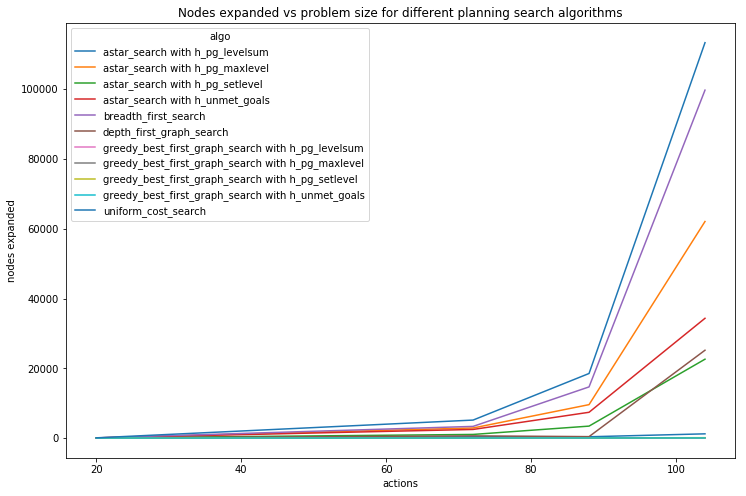

In [29]:
# using an alternative pivot for plotting
pivot2 = pd.pivot_table(df, 'nodes_expanded', 'action', 'algo')
ax = pivot2.plot(title="Nodes expanded vs problem size for different planning search algorithms", figsize=(12,8))
ax.set_xlabel("actions")
ax.set_ylabel("nodes expanded")

### Measuring time complexity:  Time required vs problem size and algorithm used

The following table and plot shows how the different algorithms perform in terms of time. For uniformed searches, the breadth first search takes the least time, as opposed to the depth first search, which takes much longer, especially as the problem size increases. This is because in the depth first search, if it goes down the 'wrong' path it will have to backtrack, and a bigger problem means it will spend a lot of time backtracking.



In [30]:
pivot3 = pd.pivot_table(df, 'time_run_pypy', 'algo', 'action')
pivot3

action,20,72,88,104
algo,,,,
astar_search with h_pg_levelsum,0.267637,15.562978,23.097150,154.348373
astar_search with h_pg_maxlevel,0.209042,85.678390,446.624085,4474.719203
astar_search with h_pg_setlevel,0.409566,90.568004,485.887562,4942.232729
astar_search with h_unmet_goals,0.015860,0.569513,0.930212,4.468241
breadth_first_search,0.032478,0.335592,0.817486,6.027091
depth_first_graph_search,0.007989,0.541581,0.179323,1341.340737
greedy_best_first_graph_search with h_pg_levelsum,0.668640,0.721489,1.349766,2.443730
greedy_best_first_graph_search with h_pg_maxlevel,0.187120,1.121079,1.508719,6.415941
greedy_best_first_graph_search with h_pg_setlevel,0.514928,1.206637,5.700636,26.430064


Text(0,0.5,'time needed (s)')

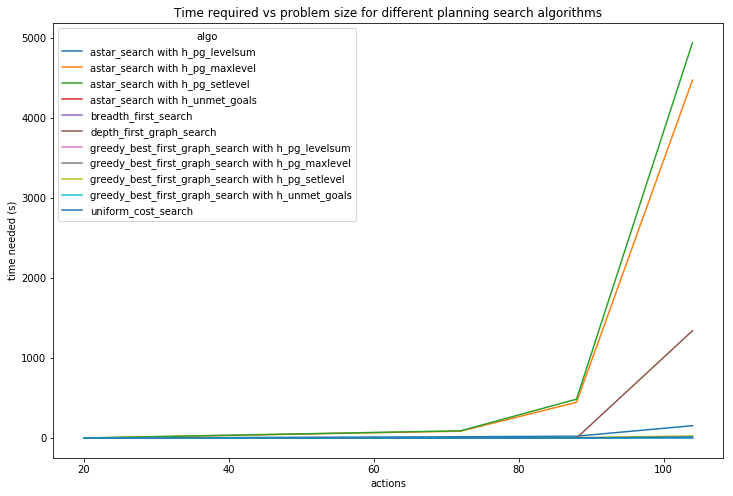

In [32]:
pivot4 = pd.pivot_table(df, 'time_run_pypy', 'action', 'algo')
ax = pivot4.plot(title="Time required vs problem size for different planning search algorithms", figsize=(12,8))
ax.set_xlabel("actions")
ax.set_ylabel("time needed (s)")

### Optimality-- which algorithms can achieve the optimal (shortest plan length) solution?



In [33]:
pivot5 = pd.pivot_table(df, 'plan_length', 'algo', 'action')
pivot5

action,20,72,88,104
algo,,,,
astar_search with h_pg_levelsum,6,9,12,15
astar_search with h_pg_maxlevel,6,9,12,14
astar_search with h_pg_setlevel,6,9,12,14
astar_search with h_unmet_goals,6,9,12,14
breadth_first_search,6,9,12,14
depth_first_graph_search,20,619,392,24132
greedy_best_first_graph_search with h_pg_levelsum,6,9,14,17
greedy_best_first_graph_search with h_pg_maxlevel,6,9,13,17
greedy_best_first_graph_search with h_pg_setlevel,6,9,17,23


### Applying search algorithms to various scenarios:

> <strong>Which algorithm or algorithms would be most appropriate for planning in a very restricted domain (i.e., one that has only a few actions) and needs to operate in real time?</strong>

For real time, we want an algorithm that runs very fast, as well as giving a short plan length. With the exception of depth first search, all of the other algorithms give an optimal solution. Since the greedy search algorithm gives the shortest times among them as well as the least number of nodes expanded (and hence uses less memory, it is probably a good choice in this scenario.

><strong>Which algorithm or algorithms would be most appropriate for planning in very large domains (e.g., planning delivery routes for all UPS drivers in the U.S. on a given day)</strong>

We would need an algorithm that runs fairly fast even on large problem size (otherwise the day will be over before the planning calculation finishes), and does not expand too many nodes( otherwise the planning computation will run out of memory). A good choice is the greedy search algorithm-- even if it doesn't give the most optimal solution, the solution isn't too far off optimal, and it runs quicker and expands less nodes as problem size increases as compared to the others.


><strong>Which algorithm or algorithms would be most appropriate for planning problems where it is important to find only optimal plans?</strong>

From the experiments, we can see that A star, breadth first and uniform cost search all return the optimal plan, even as the problem size increases. If optimality is the only consideration, all of them are appropiate choices. If we need to optimise for memory and/or time as well, then we should use A star (with unmet goal heuristic) since this algorithm + heuristic combination gives the least  increase in both memory and time as problem size increases.